## Applications with Grove Sensors: 4-Digit LED Display

### Hardware Setup




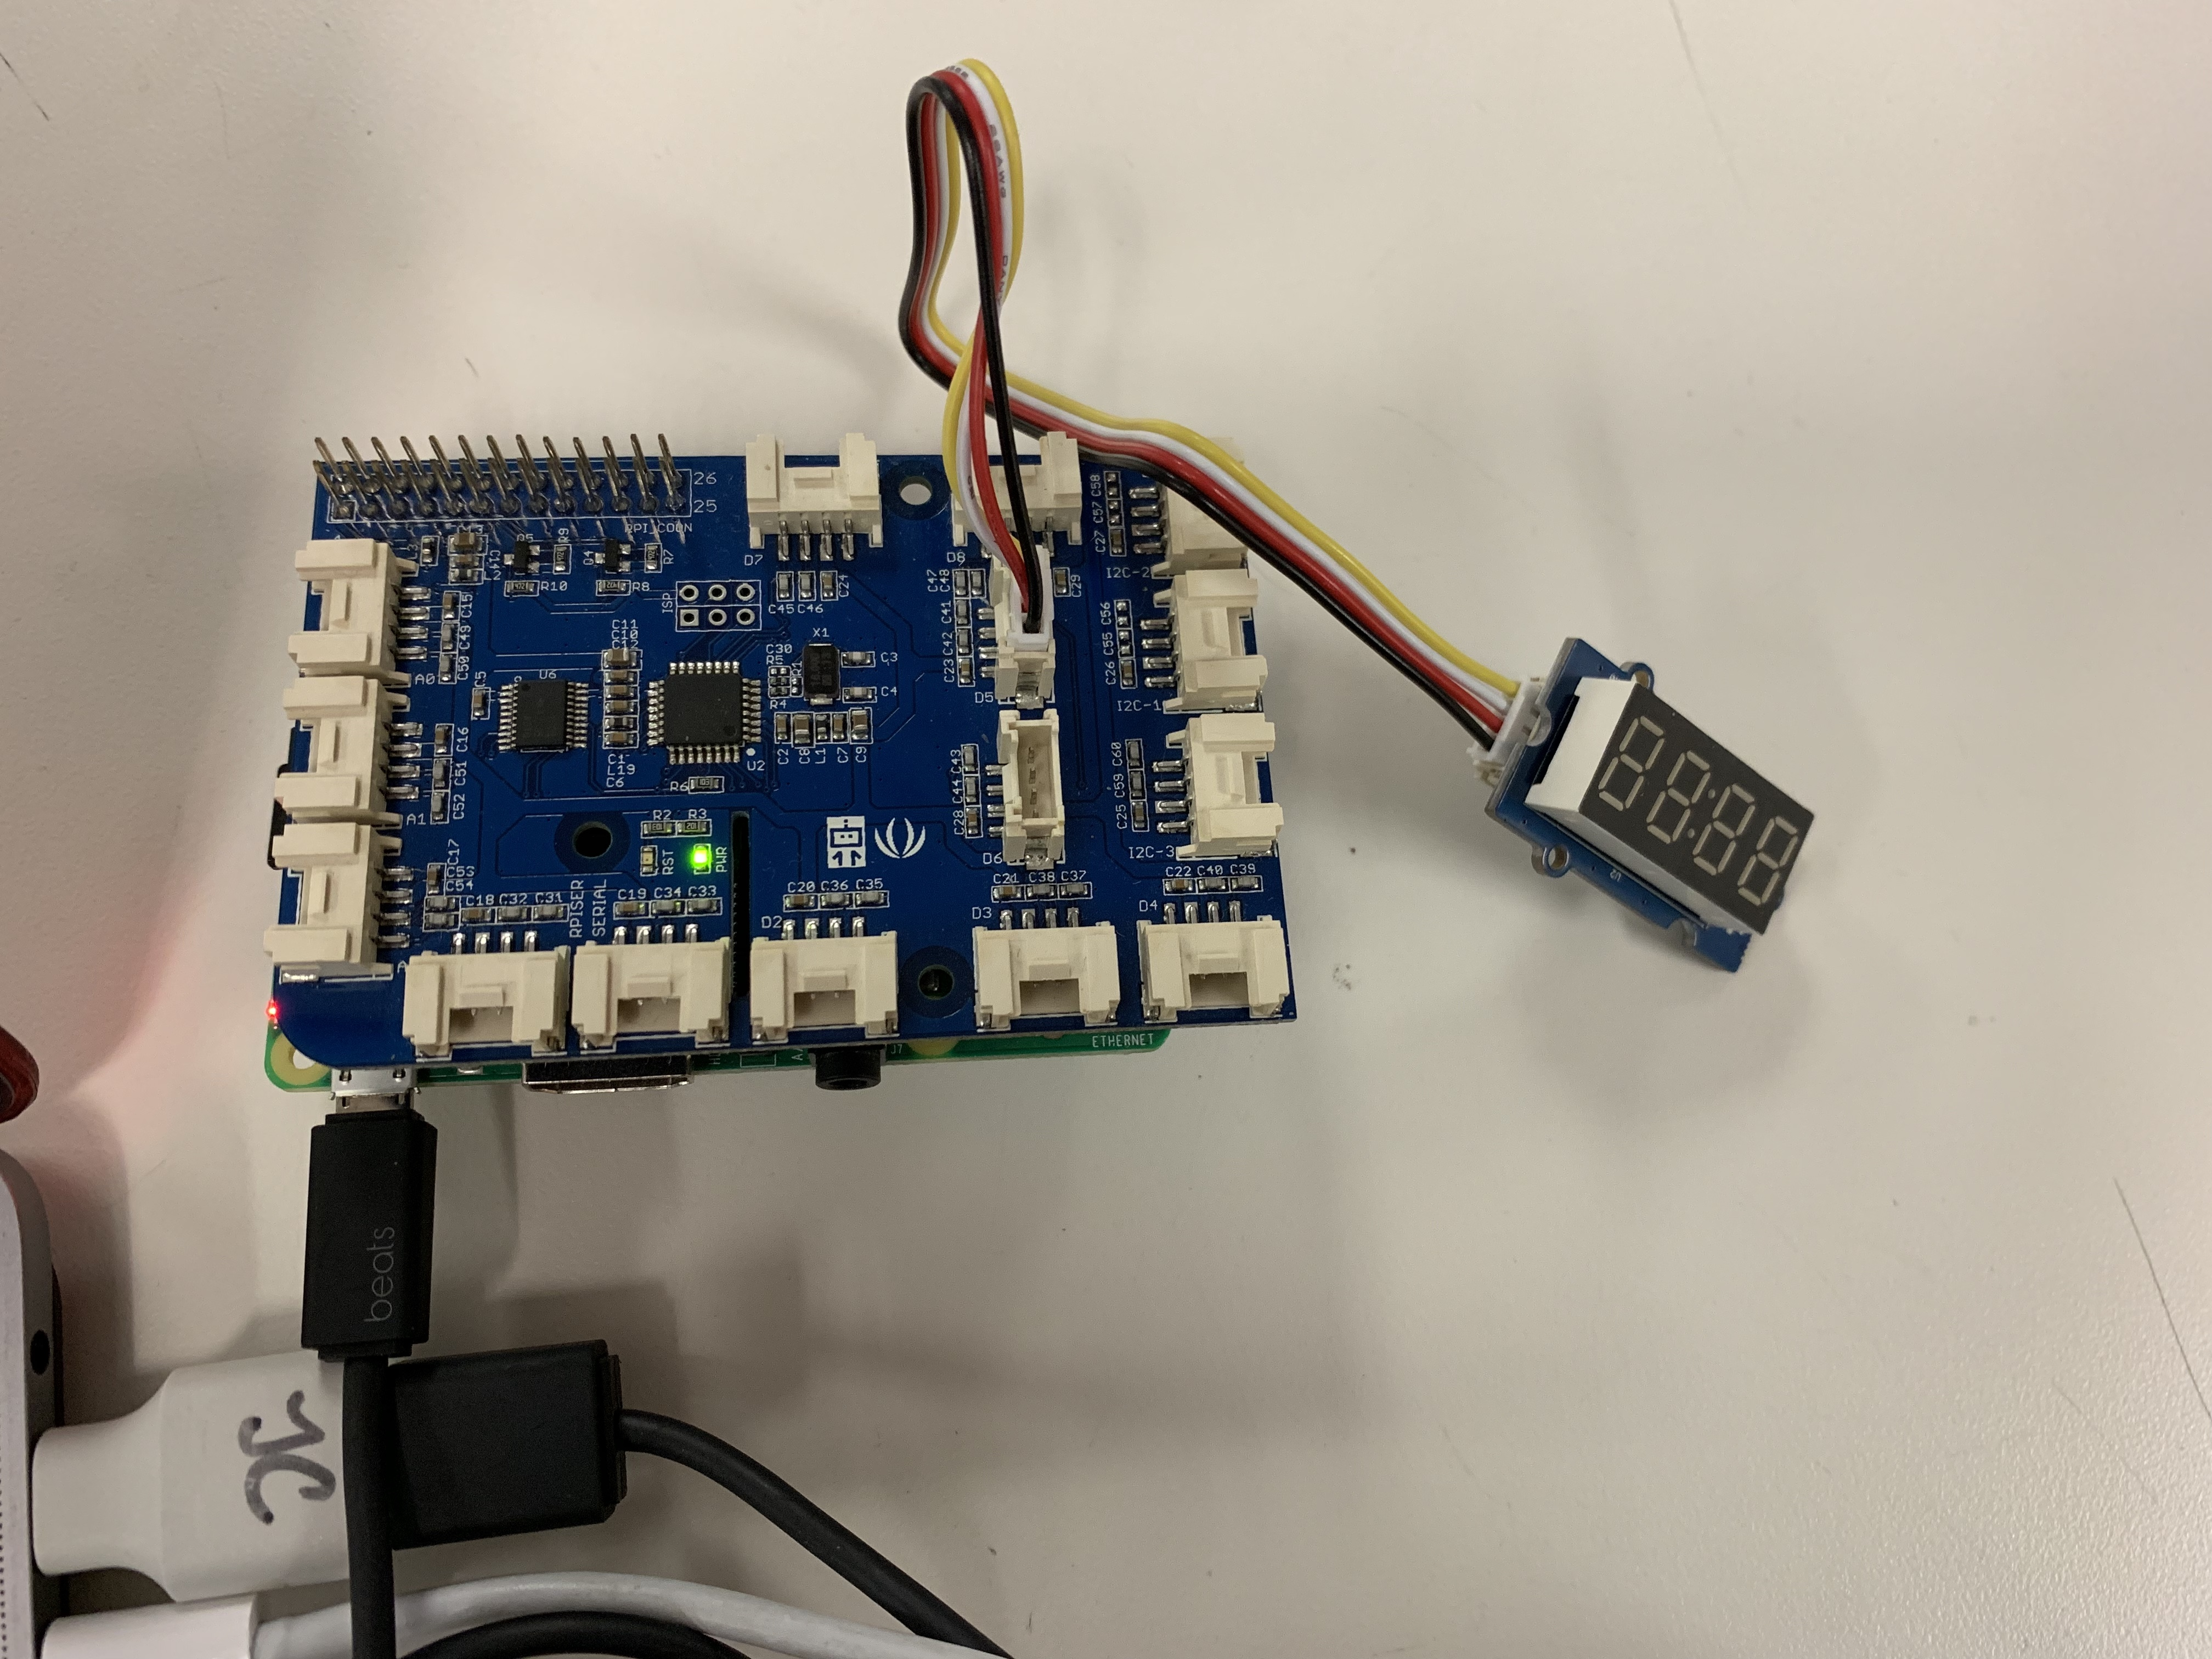

### Initialization and Imports


In [10]:
import time
import math
import grovepi

# Connect the Grove 4 Digit Display to digital port D5
# CLK,DIO,VCC,GND
display = 5
grovepi.pinMode(display,"OUTPUT")

# If you have an analog sensor connect it to A0 so you can monitor it below
sensor = 0
grovepi.pinMode(sensor,"INPUT")

time.sleep(.5)

### 11 Tests
Code can be found at the following link: https://www.mcielectronics.cl/website_MCI/static/documents/Manual_de_usuario_Grove-4-DigitDisplay.pdf
        

In [6]:
while True:
    try:
        print ("Test 1) Initialise")
        grovepi.fourDigit_init(display)
        time.sleep(.5)

        print ("Test 2) Set brightness")
        for i in range(0,8):
            grovepi.fourDigit_brightness(display,i)
            time.sleep(.2)
        time.sleep(.3)

        # set to lowest brightness level
        grovepi.fourDigit_brightness(display,0)
        time.sleep(.5)

        print ("Test 3) Set number without leading zeros")
        leading_zero = 0
        grovepi.fourDigit_number(display,1,leading_zero)
        time.sleep(.5)
        grovepi.fourDigit_number(display,12,leading_zero)
        time.sleep(.5)
        grovepi.fourDigit_number(display,123,leading_zero)
        time.sleep(.5)
        grovepi.fourDigit_number(display,1234,leading_zero)
        time.sleep(.5)

        print ("Test 4) Set number with leading zeros")
        leading_zero = 1
        grovepi.fourDigit_number(display,5,leading_zero)
        time.sleep(.5)
        grovepi.fourDigit_number(display,56,leading_zero)
        time.sleep(.5)
        grovepi.fourDigit_number(display,567,leading_zero)
        time.sleep(.5)
        grovepi.fourDigit_number(display,5678,leading_zero)
        time.sleep(.5)

        print ("Test 5) Set individual digit")
        grovepi.fourDigit_digit(display,0,2)
        grovepi.fourDigit_digit(display,1,6)
        grovepi.fourDigit_digit(display,2,9)
        grovepi.fourDigit_digit(display,3,15) # 15 = F
        time.sleep(.5)

        print ("Test 6) Set individual segment")
        grovepi.fourDigit_segment(display,0,118) # 118 = H
        grovepi.fourDigit_segment(display,1,121) # 121 = E
        grovepi.fourDigit_segment(display,2,118) # 118 = H
        grovepi.fourDigit_segment(display,3,121) # 121 = E
        time.sleep(.5)

        grovepi.fourDigit_segment(display,0,57) # 57 = C
        grovepi.fourDigit_segment(display,1,63) # 63 = O
        grovepi.fourDigit_segment(display,2,63) # 63 = O
        grovepi.fourDigit_segment(display,3,56) # 56 = L
        time.sleep(.5)

        print ("Test 7) Set score")
        grovepi.fourDigit_score(display,0,0)
        time.sleep(.2)
        grovepi.fourDigit_score(display,1,0)
        time.sleep(.2)
        grovepi.fourDigit_score(display,1,1)
        time.sleep(.2)
        grovepi.fourDigit_score(display,1,2)
        time.sleep(.2)
        grovepi.fourDigit_score(display,1,3)
        time.sleep(.2)
        grovepi.fourDigit_score(display,1,4)
        time.sleep(.2)
        grovepi.fourDigit_score(display,1,5)
        time.sleep(.5)

        print ("Test 8) Set time")
        grovepi.fourDigit_score(display,12,59)
        time.sleep(.5)

        print ("Test 9) Monitor analog pin")
        seconds = 10
        grovepi.fourDigit_monitor(display,sensor,seconds)
        time.sleep(.5)

        print ("Test 10) Switch all on")
        grovepi.fourDigit_on(display)
        time.sleep(.5)

        print ("Test 11) Switch all off")
        grovepi.fourDigit_off(display)
        time.sleep(.5)

    except KeyboardInterrupt:
        grovepi.fourDigit_off(display)
        break
    except IOError:
        print ("Error")

Test 1) Initialise
Test 2) Set brightness
Test 3) Set number without leading zeros
Test 4) Set number with leading zeros


### Isolated Test

In [9]:
grovepi.fourDigit_segment(display,0,118) # 118 = H
grovepi.fourDigit_segment(display,1,121) # 121 = E
grovepi.fourDigit_segment(display,2,118) # 118 = H
grovepi.fourDigit_segment(display,3,121) # 121 = E
time.sleep(.5)

grovepi.fourDigit_segment(display,0,57) # 57 = C
grovepi.fourDigit_segment(display,1,63) # 63 = O
grovepi.fourDigit_segment(display,2,63) # 63 = O
grovepi.fourDigit_segment(display,3,56) # 56 = L
time.sleep(.5)


### Define dictionary for LED segment argument values

In [3]:
chars = {'0': 0x3f,
        '1': 0x06,
        '2': 0x5b,
        '3': 0x4f,
        '4': 0x66,
        '5': 0x6d,
        '6': 0x7d,
        '7': 0x07,
        '8': 0x7f,
        '9': 0x6f,
        'A': 0x77,
        'B': 0x7f,
        'b': 0x7C,
        'C': 0x39,
        'c': 0x58,
        'D': 0x3f,
        'd': 0x5E,
        'E': 0x79,
        'F': 0x71,
        'G': 0x7d,
        'H': 0x76,
        'h': 0x74,
        'I': 0x06,
        'J': 0x1f,
        'K': 0x76,
        'L': 0x38,
        'l': 0x06,
        'n': 0x54,
        'O': 0x3f,
        'o': 0x5c,
        'P': 0x73,
        'r': 0x50,
        'S': 0x6d,
        'U': 0x3e,
        'V': 0x3e,
        'Y': 0x66,
        'Z': 0x5b,
        '-': 0x40,
        '_': 0x08,
        ' ': 0x00}

In [5]:
''' This does not necessarily get used, but it is good to be able to reference it when the user wants
to be able to identify which values cannot be represeted with the LED display '''

invalid = ['a', 'e', 'f', 'g', 'i', 'j', 'k', 'M', 'm', 'p', 'Q', 'q', 'R', 's', 'T', 't', 'u', 'v', 'W', 'w', 'y', 'z']

### Application 1: Print a character at a specified position

In [31]:
x = input("What letter would you like displayed?")
hex_num = chars[x]

y = int(input("Where do you want the letter (0 is leftmost and 3 is rightmost)"))

grovepi.fourDigit_segment(display,y,int(hex_num))
time.sleep(1)


What letter would you like displayed?b
Where do you want the letter (0 is leftmost and 3 is rightmost)2


### Application 2: Slide a character across the display screen

In [34]:
# Reset display screen
grovepi.fourDigit_off(display)

# Obtain character input
x = input("What character would you like to slide across the display?")
hex_num = chars[x]

# Alter the position of the digit with respect to the LED Display
for y in range(4):
    grovepi.fourDigit_segment(display,3-y,int(hex_num))
    time.sleep(1)
    grovepi.fourDigit_segment(display,3-y,0)

# Reset display screen
grovepi.fourDigit_off(display)

What character would you like to slide across the display?c


1

### Application 3: Scroll all (feasible) characters across the screen

In [4]:
''' Sort the dictionary (alphabetical order) and output its contents '''
from collections import OrderedDict
chars_od = OrderedDict(sorted(chars.items(), key=lambda x: x[0]))
for k, v in chars_od.items():
    print(k, v)

  0
- 64
0 63
1 6
2 91
3 79
4 102
5 109
6 125
7 7
8 127
9 111
A 119
B 127
C 57
D 63
E 121
F 113
G 125
H 118
I 6
J 31
K 118
L 56
O 63
P 115
S 109
U 62
V 62
Y 102
Z 91
_ 8
b 124
c 88
d 94
h 116
l 6
n 84
o 92
r 80


In [45]:
# Initialize display screen
grovepi.fourDigit_off(display)
count = 0
a = 0
b = 0
c = 0
d = 0

# Scroll current 4 letters left by one, making room for a new letter with each iteration
for key in chars_od:
    a = b
    b = c
    c = d
    d = chars[key]
    grovepi.fourDigit_segment(display,0, a)
    grovepi.fourDigit_segment(display, 1, b)
    grovepi.fourDigit_segment(display, 2, c)
    grovepi.fourDigit_segment(display, 3, d)
    time.sleep(0.3)
    count = count + 1
    
# Reset display screen iteratively
for i in range(4):
    a = b
    b = c
    c = d
    d = 0
    grovepi.fourDigit_segment(display,0, a)
    grovepi.fourDigit_segment(display, 1, b)
    grovepi.fourDigit_segment(display, 2, c)
    grovepi.fourDigit_segment(display, 3, d)
    time.sleep(0.3)


### Application 4: Allow the user to display custom message across the screen

In [41]:
import string

sentence = input("What sentence would you like to print?")

# Initialize display screen
count = 0
a = 0
b = 0
c = 0
d = 0

# Iterate through the sentence, shifting the 3 previous letters to the left to make room for each new letter
for letter in sentence:
    a = b
    b = c
    c = d
    # If a given letter is unavailable, flip its case
    if letter not in chars:
        d = chars[letter.swapcase()]
    else:
        d = chars[letter]
    grovepi.fourDigit_segment(display,0, a)
    grovepi.fourDigit_segment(display, 1, b)
    grovepi.fourDigit_segment(display, 2, c)
    grovepi.fourDigit_segment(display, 3, d)
    time.sleep(0.3)
    count = count + 1
    
# Reset display screen
for i in range(4):
    a = b
    b = c
    c = d
    d = 0
    grovepi.fourDigit_segment(display,0, a)
    grovepi.fourDigit_segment(display, 1, b)
    grovepi.fourDigit_segment(display, 2, c)
    grovepi.fourDigit_segment(display, 3, d)
    time.sleep(0.3)

What sentence would you like to print?abc easy as 123


### Application 5: Stopwatch

In [18]:
starttime = time.time()
for i in range(6000):
    diff = time.time() - starttime
    diff = round(diff, 2)
    integer, d = divmod(diff, 1)
    if (integer > 60):
        grovepi.fourDigit_score(display,60,00)
        break
    grovepi.fourDigit_score(display,int(integer),int(d * 100))
    time.sleep(.01)